In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.utils import to_categorical

# this module has the mnist data set
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(test_images.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


(28, 28)
4


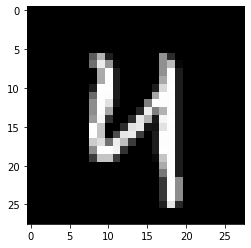

In [3]:
sample = 789
print(test_images[sample].shape)
# print(test_images[sample])
print(test_labels[sample])

plt.imshow(test_images[sample],  cmap='gray')

In [4]:
train_images_standard = train_images.reshape((60000, 28*28))
train_images_standard = train_images_standard.astype('float32') / 255

test_images_standard = test_images.reshape((10000, 28*28))
test_images_standard  = test_images_standard.astype('float32') / 255

print(train_images.shape)
print(train_images_standard.shape)

(60000, 28, 28)
(60000, 784)


In [5]:
print(train_labels)
print(train_labels.shape)

train_labels_standard = to_categorical(train_labels)
test_labels_standard = to_categorical(test_labels)

print(train_labels_standard[0])
print(train_labels_standard.shape)

[5 0 4 ... 5 6 8]
(60000,)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)


In [6]:
network = models.Sequential()

network.add(layers.Dense(32, activation='sigmoid', input_shape=(784,)))
network.add(layers.Dense(32, activation='sigmoid'))
network.add(layers.Dense(32, activation='sigmoid'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [8]:
x_train = train_images_standard[:42000]
x_val = train_images_standard[42000:]

y_train = train_labels_standard[:42000]
y_val = train_labels_standard[42000:]

In [9]:
history = network.fit(x_train, y_train, epochs=25, validation_data = (x_val, y_val))

Epoch 1/25
1313/1313 [==============================] - 3s 2ms/step - loss: 2.3072 - accuracy: 0.1153 - val_loss: 2.2979 - val_accuracy: 0.1068
Epoch 2/25
1313/1313 [==============================] - 2s 2ms/step - loss: 2.2951 - accuracy: 0.1197 - val_loss: 2.2929 - val_accuracy: 0.1079
Epoch 3/25
1313/1313 [==============================] - 2s 2ms/step - loss: 2.2888 - accuracy: 0.1294 - val_loss: 2.2849 - val_accuracy: 0.2207
Epoch 4/25
1313/1313 [==============================] - 2s 2ms/step - loss: 2.2792 - accuracy: 0.1533 - val_loss: 2.2731 - val_accuracy: 0.1650
Epoch 5/25
1313/1313 [==============================] - 2s 2ms/step - loss: 2.2623 - accuracy: 0.2124 - val_loss: 2.2504 - val_accuracy: 0.2363
Epoch 6/25
1313/1313 [==============================] - 2s 2ms/step - loss: 2.2273 - accuracy: 0.2441 - val_loss: 2.1997 - val_accuracy: 0.2864
Epoch 7/25
1313/1313 [==============================] - 2s 2ms/step - loss: 2.1490 - accuracy: 0.2721 - val_loss: 2.0888 - val_accuracy:

In [10]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

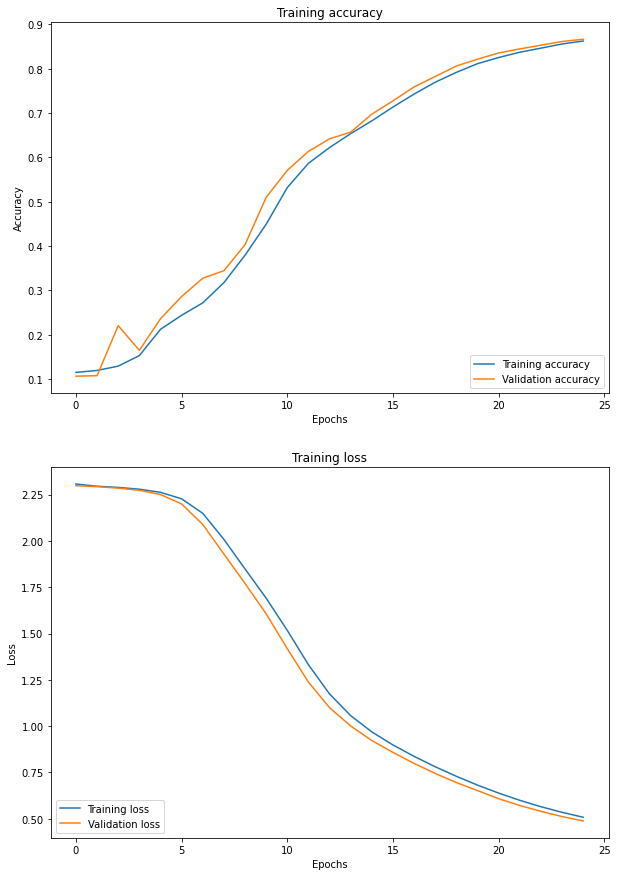

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].plot(acc_values, label="Training accuracy")
ax[0].plot(val_acc_values, label="Validation accuracy")
ax[0].set_title("Training accuracy")
ax[0].legend(loc='lower right')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].plot(loss_values, label="Training loss")
ax[1].plot(val_loss_values, label="Validation loss")
ax[1].set_title("Training loss")
ax[1].legend(loc='lower left')


In [12]:
test_results = network.evaluate(test_images_standard, test_labels_standard)
print(test_results)

313/313 [==============================] - 0s 1ms/step - loss: 0.4796 - accuracy: 0.8717
[0.4795692265033722, 0.8716999888420105]


[[0.011 0.    0.039 0.    0.035 0.004 0.901 0.    0.009 0.001]]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


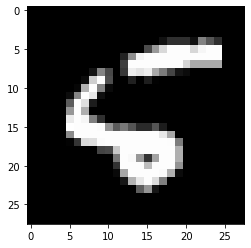

In [13]:
test_image = 8

input_image = test_images[test_image].reshape((1, 784))
input_image = input_image.astype('float32') / 255

prediction = network.predict(input_image)

np.set_printoptions(precision=3, suppress=True)
print(prediction)
print(test_labels_standard[test_image])

plt.imshow(test_images[test_image],  cmap='gray')